In [86]:
%matplotlib inline 

import numpy as np
import pandas as pd
from functools import *
import operator
from math import sqrt, log, floor
from random import random
import matplotlib.pyplot as plt
from functools import partial

from operator import add
from itertools import accumulate
from operator import add

In [2]:
fractions = list(map(lambda x: x / 100, [0.3644169329073482, 0.47769947500354726, 0.32080659945004586, 0.8733391910962004, 0.7513207847718162, 0.45733439381888424, 0.29757520403052357, 0.24857142857142855, 1.4942331603996055, 0.5159958720330238, 0.5660788155889397, 0.47406231726672793, 1.2419184764663904, 1.193878199022036, 0.19138976641224895, 0.23599851408342984, 1.2340249856404366, 1.0641039407280146, 0.5726093952109033, 1.217667336259703, 1.0716666381800468, 0.38045290569012036, 1.7770105128842646, 0.27783180062789986, 0.7109302158789357, 0.4337137025698117, 0.18316242630052007, 1.0024477193552646, 0.3810477280156914, 0.3638093916353579, 0.9213376827112228, 0.6082174053704303, 0.4520219640202651, 0.6420924728334417, 0.5688468419297129, 0.1945249719071946, 0.25551194584200404, 0.3052827183435094, 0.30005352713675054, 0.19329241412051953, 0.4279754788492356, 0.4348670647726347, 0.5924733580924492, 0.18764761072826683, 0.3124479253457757, 0.8574620158110712, 0.18053942038996515, 1.1185610801034065, 0.31999704048979893, 0.42498465186188794, 0.2520358009909439, 0.17921533910565068, 0.5160461562313128, 0.23913522481303384, 0.20030904824586507, 0.7692698713929884, 0.2255788250630544, 0.19540676389918896, 0.27178573098928965, 0.5596863000570022, 0.37938158267180955, 0.53983771451486, 0.20446439552330586, 0.5603448275862069, 0.6039204622884425, 0.6118861418494062, 0.16681750360785658, 1.0673548551285086, 0.8803353463878243, 1.1744337012143957, 0.4357107950307364, 0.3394233014242353, 0.4935939002303065, 0.36049673299835716, 0.8499594848115015, 0.2324152127296979, 0.42039659120027106, 0.21361697930536847, 0.7142887496790071, 0.28813127542011824, 0.6052246170920419, 0.1740008980691513, 0.7435714137514123, 0.526625621489475, 0.5267910616234531, 0.2829047124642401, 0.18436676934065444, 0.2817479764350788, 0.8259133280209354, 0.6116714604852174, 0.2908348078124491, 0.41935745813192254, 0.5050738804566697, 0.6243701308237097, 0.3245238219863219, 0.46339171935068907, 0.3010225024756666, 0.5116782187837371, 0.13650155917729231, 0.4064367854621333]))
test_data = []
for i, p in enumerate(fractions):
    test_data.append((i, p / 100))
test_data = np.array(test_data)

In [18]:
def optimum_n(fractions, nitems):
    tmp = np.array(fractions)
    tmp.sort()
    return tmp[::-1][:nitems]

In [53]:
def range_items(weight_function, n_items):
    items = list(range(0, n_items))
    sorted_desc_by_value = sorted(items, key=weight_function)[::-1]
    return sorted_desc_by_value
        

In [5]:
def increment_impressions(impression, indices):
    for idx in indices:
        impression[idx] += 1

In [16]:
def increment_conversions(conversion, fractions, winners):
    for w in winners:
        chance = random()
        if chance < fractions[w]:
            conversion[w] += 1

In [72]:
def simulation(n_iterations, fractions, block_size, range_function):
    optimum = optimum_n(fractions, block_size)
    n_items = len(fractions)
    
    impression = {}
    conversion = {}

    for i in range(0, n_items):
        impression[i] = 0
        conversion[i] = 0

    regret = []
    for i in range(0, n_iterations):
        winners = range_function(impression, conversion)[:block_size]
        increment_impressions(impression, winners)
        increment_conversions(conversion, fractions, winners)
    
        best = reduce(lambda a,b: a + b, [floor(f * i) for f in optimum])
        actual = reduce(lambda a,b: a + b, [value for key, value in conversion.items()])
        regret.append(best - actual)
        
    return regret


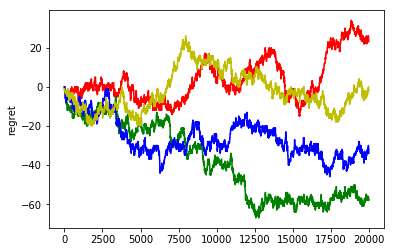

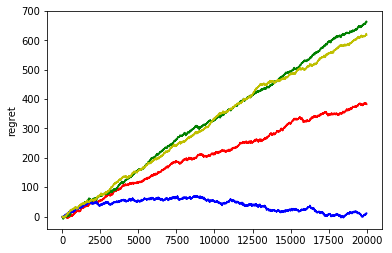

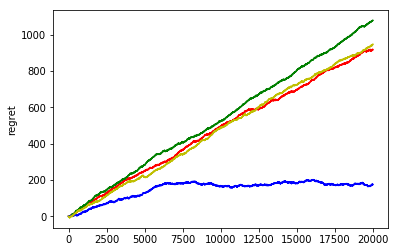

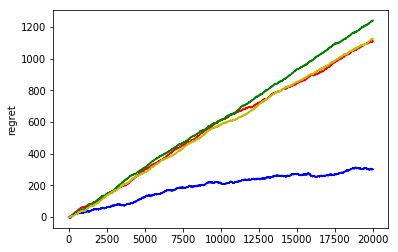

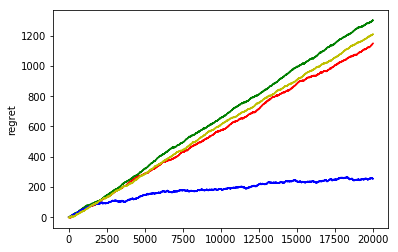

In [95]:
block_size = 10
n_iterations = 20000

def ucb1(impression, conversion):
    def w(idx):
        total_impressions = reduce(lambda a, b: a + b, [value for key, value in impression.items()])
        conv_count = conversion[idx]
        imp_count = impression[idx] + 1
        return conv_count / imp_count + sqrt(log(total_impressions + 1) / imp_count)
    
    return range_items(w, len(impression.keys()))
    
def rnd_weight(impression, conversion):
    return range_items(lambda x: random(), len(impression.keys()))

def simple_greedy(impression, conversion):
    def w(idx):
        conv_count = conversion[idx] + 1
        imp_count = impression[idx] + 1
        return conv_count / imp_count
    
    return range_items(w, len(impression.keys()))

def proportional(impression, conversion):
    def cum_sum(l):
        return accumulate(l, add)
    
    fract = [(conversion[i] + 1)/(impression[i] + 1) for i in range(0, len(impression.keys()))]
    s = reduce(lambda a, b : a+b, fract)
    x = list(map(lambda x: x / s, fract))
    probabilities = list(cum_sum(x))

    uniq = set()
    result = []
    
    while (len(uniq) < len(impression.keys())):
        test = random()
        for i, x in enumerate(probabilities):
            if x >= test:
                if i in uniq:
                    continue
                else:
                    uniq.add(i)
                    result.append(i)
    
    return result

for i in [10, 20, 30, 40, 50]:
    test_items = fractions[:i]

    regret_ucb1 = simulation(n_iterations, test_items, block_size, ucb1)
    regret_random = simulation(n_iterations, test_items, block_size, rnd_weight)
    regret_greedy = simulation(n_iterations, test_items, block_size, simple_greedy)
    regret_prop = simulation(n_iterations, test_items, block_size, proportional)

    plt.plot(regret_ucb1, 'r')
    plt.plot(regret_random, 'g')
    plt.plot(regret_greedy, 'b')
    plt.plot(regret_prop, 'y')
    plt.ylabel('regret')
    plt.show()


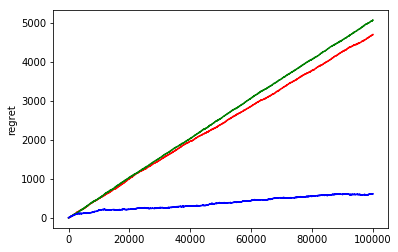

In [69]:
n_iterations = 100000

test_items = fractions

regret_ucb1 = simulation(n_iterations, test_items, block_size, ucb1)
regret_random = simulation(n_iterations, test_items, block_size, rnd_weight)
regret_greedy = simulation(n_iterations, test_items, block_size, simple_greedy)

plt.plot(regret_ucb1, 'r')
plt.plot(regret_random, 'g')
plt.plot(regret_greedy, 'b')
plt.ylabel('regret')
plt.show()

In [87]:
def cum_sum(l):
    return accumulate(l, add)

s = reduce(lambda a, b : a+b, x)
x = list(map(lambda x: x / s, x))
probabilities = list(cum_sum(x))


[1, 2, 3, 4, 5, 2, 5, 3, 1]
[0.038461538461538464, 0.07692307692307693, 0.11538461538461539, 0.15384615384615385, 0.19230769230769232, 0.07692307692307693, 0.19230769230769232, 0.11538461538461539, 0.038461538461538464]


[0.038461538461538464,
 0.11538461538461539,
 0.23076923076923078,
 0.38461538461538464,
 0.576923076923077,
 0.653846153846154,
 0.8461538461538463,
 0.9615384615384617,
 1.0000000000000002]